# Setup & Load Data

In [1]:
from __future__ import unicode_literals
import os
import sys
# sys.path.append('../')
import datetime
import pandas as pd
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.dates as md
import matplotlib.dates as mdates
import random
import seaborn as sns
%matplotlib inline
sys.path.append('../')
from matplotlib import font_manager, rc
from tools.utils import *
from pytz import timezone
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset, inset_axes

# font setup
font_dirs = ['../']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
plt.rcParams['font.family'] = 'Times New Roman'

data_path = '../enertalk-dataset/'
fig_width = 8.9
golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_height = fig_width*golden_mean # height in inches

date_lst = pd.date_range('2016-09-01', '2017-04-30')
meta = pd.read_csv('meta.csv')
meta['app_name'] = meta['app'].str[3:]
meta = meta.loc[meta['app_name']=='total']

meta_dict = {}

for psn in pd.unique(meta['psn']):
    meta_dict[psn] = {}
    meta_target = meta.loc[meta['psn']==psn]
    for date in sorted(pd.unique(meta_target['date'])):
        target_row = meta_target.loc[meta_target['date']==date]
        date = str(date)
        date_str = date[:4]+'-'+date[4:6]+'-'+date[6:8]
        meta_dict[psn][date_str] = target_row['observation_ratio'].values[0]
        

summary = pd.DataFrame(meta_dict).transpose().sort_index()
summary = summary.reset_index()
summary = summary.rename({'index': 'House'}, axis='columns')
summary['House'] = summary['House'].astype(str)
summary['House'] = summary['House'].str.zfill(2)
summary = summary.sort_values(by='House')
summary = summary.set_index('House')
summary.head()


,2016-09-01,2016-09-02,2016-09-03,2016-09-04,2016-09-05,2016-09-06,2016-09-07,2016-09-08,2016-09-09,2016-09-10,...,2017-04-21,2017-04-22,2017-04-23,2017-04-24,2017-04-25,2017-04-26,2017-04-27,2017-04-28,2017-04-29,2017-04-30
House,,,,,,,,,,,,,,,,,,,,,
00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04,0.995891,0.995891,0.995637,0.993981,0.99625,0.996111,0.995891,0.996227,0.99625,0.995961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualize Figure 11. Heatmap of daily observation ratio for the 22 houses.

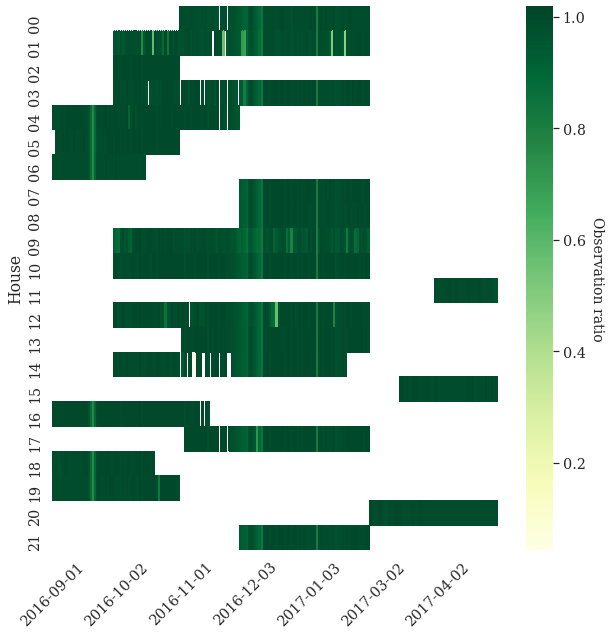

In [2]:

overall_fontsize = 14
nice_fonts = {
        # Use LaTex to write all text
        "text.usetex": False,
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": overall_fontsize,
        "font.size": overall_fontsize,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": overall_fontsize,
        "xtick.labelsize": overall_fontsize,
        "ytick.labelsize": overall_fontsize,
        "font.family": 'Times New Roman'
}
mpl.rcParams.update(nice_fonts)

sns.set(font_scale=1.3)
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

fig, ax = plt.subplots(figsize=(10,10))
heat = sns.heatmap(summary, ax=ax,  cmap="YlGn",
                   cbar_kws={'label': 'Observation ratio'}, xticklabels=30)
heat.set_facecolor('xkcd:white')
fig.axes[-1].set_ylabel( 'Observation ratio', fontsize=14, rotation=-90, va="bottom")
plt.xticks(rotation=45)
plt.show()
fig.savefig('../plots/observation_distribution.pdf', bbox_inches='tight', format='pdf', dpi=1000)